# Pratique 1: Scripting

Crie um jupyter notebook com os imports necessários e um código para gerar os gráficos referentes a base de dados de março, abril, maio, junho e dezembro (numa célula só ou em várias).

### Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_theme()  

### Carregando o Dataframe de Março

In [2]:
sinasc_mar = pd.read_csv('input\SINASC_RO_2019_MAR.csv')
sinasc_mar.head()

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI
0,19,Masculino,9.0,10.0,3685,4,2019-02-19,37 a 41 semanas,Única,8 a 11 anos,26.0
1,29,Feminino,8.0,9.0,3055,4,2019-02-21,37 a 41 semanas,Única,8 a 11 anos,24.0
2,37,Feminino,8.0,10.0,3460,4,2019-02-25,37 a 41 semanas,Única,8 a 11 anos,32.0
3,30,Feminino,9.0,10.0,2982,3,2019-03-20,37 a 41 semanas,Única,12 anos ou mais,24.0
4,30,Feminino,8.0,10.0,3310,4,2019-03-23,37 a 41 semanas,Única,8 a 11 anos,27.0


### Convertendo o formato de data para o padrão brasileiro (DD-MM-AAAA)

In [3]:
sinasc_mar['DTNASC'] = pd.to_datetime(sinasc_mar['DTNASC'])
sinasc_mar.head()

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI
0,19,Masculino,9.0,10.0,3685,4,2019-02-19,37 a 41 semanas,Única,8 a 11 anos,26.0
1,29,Feminino,8.0,9.0,3055,4,2019-02-21,37 a 41 semanas,Única,8 a 11 anos,24.0
2,37,Feminino,8.0,10.0,3460,4,2019-02-25,37 a 41 semanas,Única,8 a 11 anos,32.0
3,30,Feminino,9.0,10.0,2982,3,2019-03-20,37 a 41 semanas,Única,12 anos ou mais,24.0
4,30,Feminino,8.0,10.0,3310,4,2019-03-23,37 a 41 semanas,Única,8 a 11 anos,27.0


### Gerando os gráficos

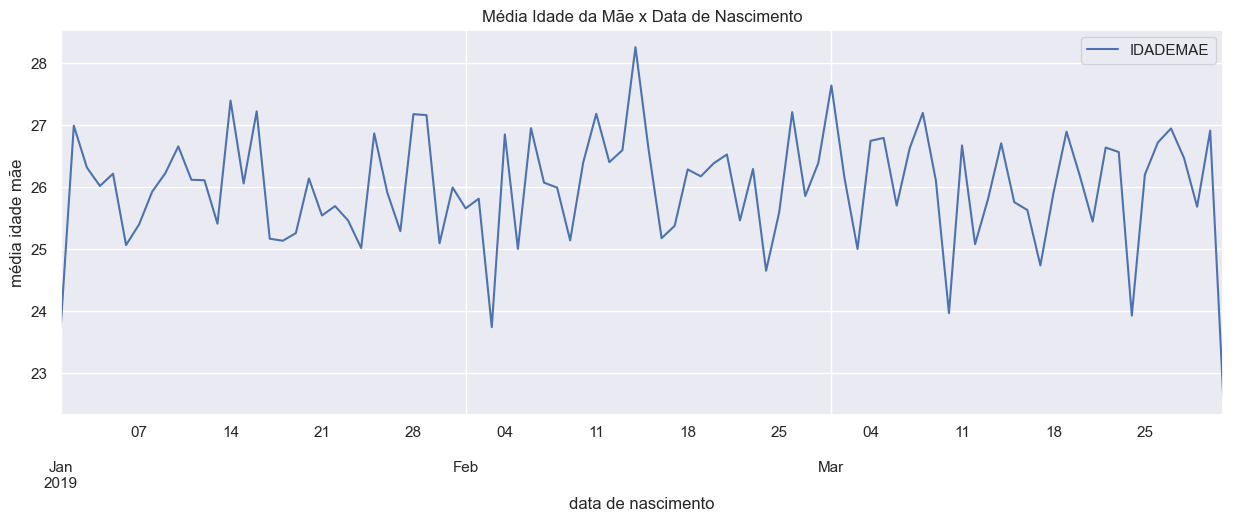

In [4]:
pd.pivot_table(sinasc_mar, values='IDADEMAE', index='DTNASC',
               aggfunc='mean').plot(figsize=[15, 5])
plt.title("Média Idade da Mãe x Data de Nascimento")
plt.xlabel("data de nascimento")
plt.ylabel('média idade mãe');

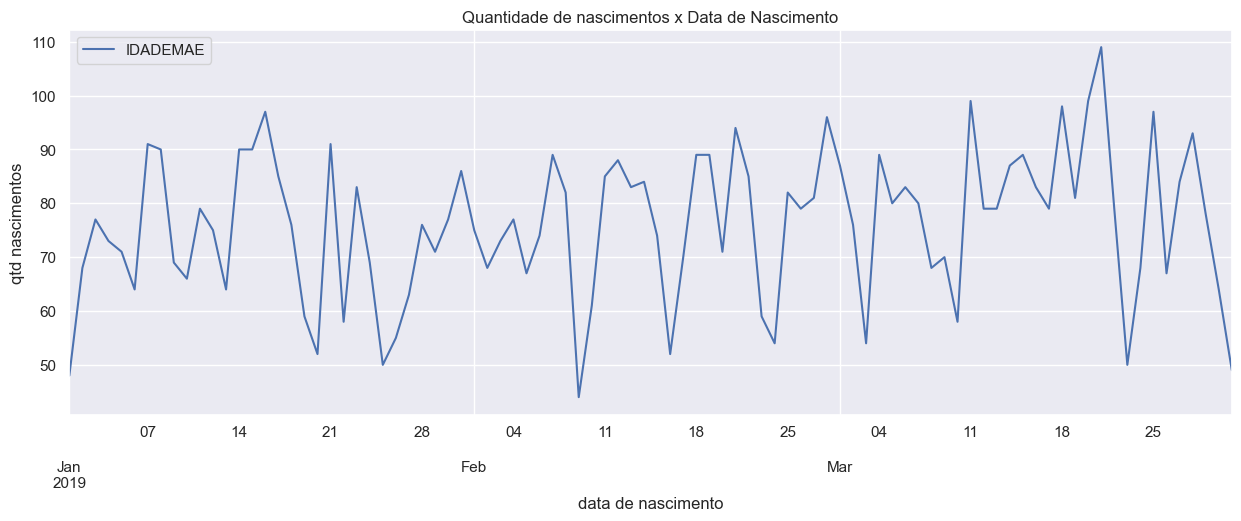

In [5]:
pd.pivot_table(sinasc_mar, values='IDADEMAE', index='DTNASC',
               aggfunc='count').plot(figsize=[15, 5])
plt.title("Quantidade de nascimentos x Data de Nascimento")
plt.xlabel("data de nascimento")
plt.ylabel('qtd nascimentos');

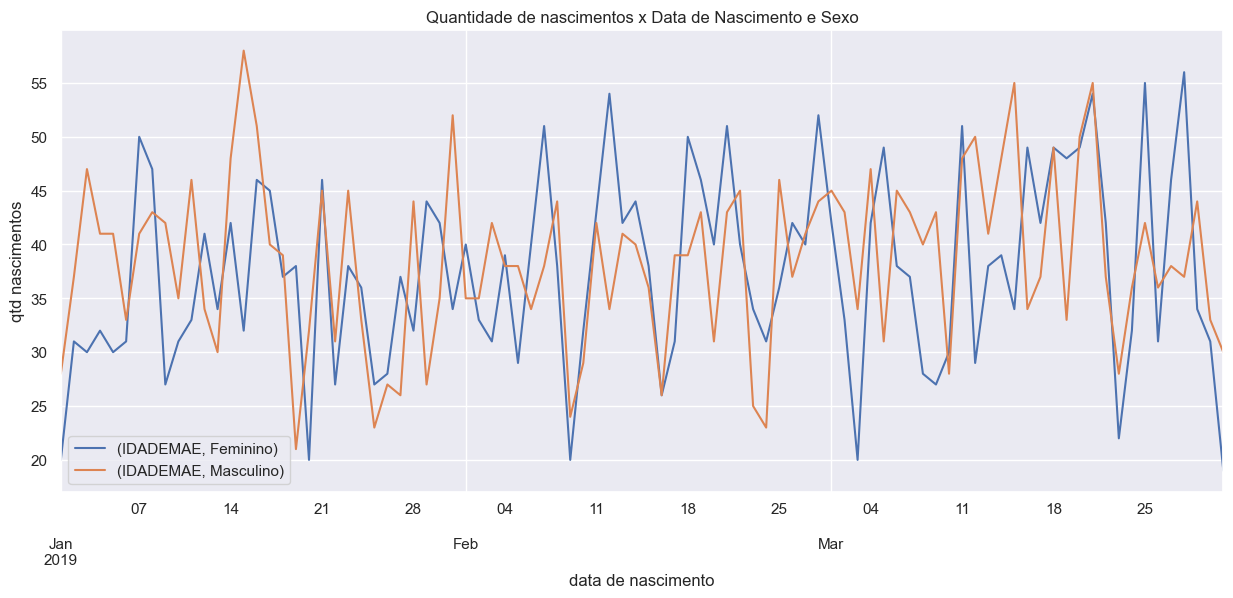

In [6]:
pd.pivot_table(sinasc_mar, values='IDADEMAE', index=['DTNASC', 'SEXO'],
               aggfunc='count').unstack().plot(figsize=[15, 6])
plt.legend()
plt.title("Quantidade de nascimentos x Data de Nascimento e Sexo")
plt.xlabel("data de nascimento")
plt.ylabel('qtd nascimentos');

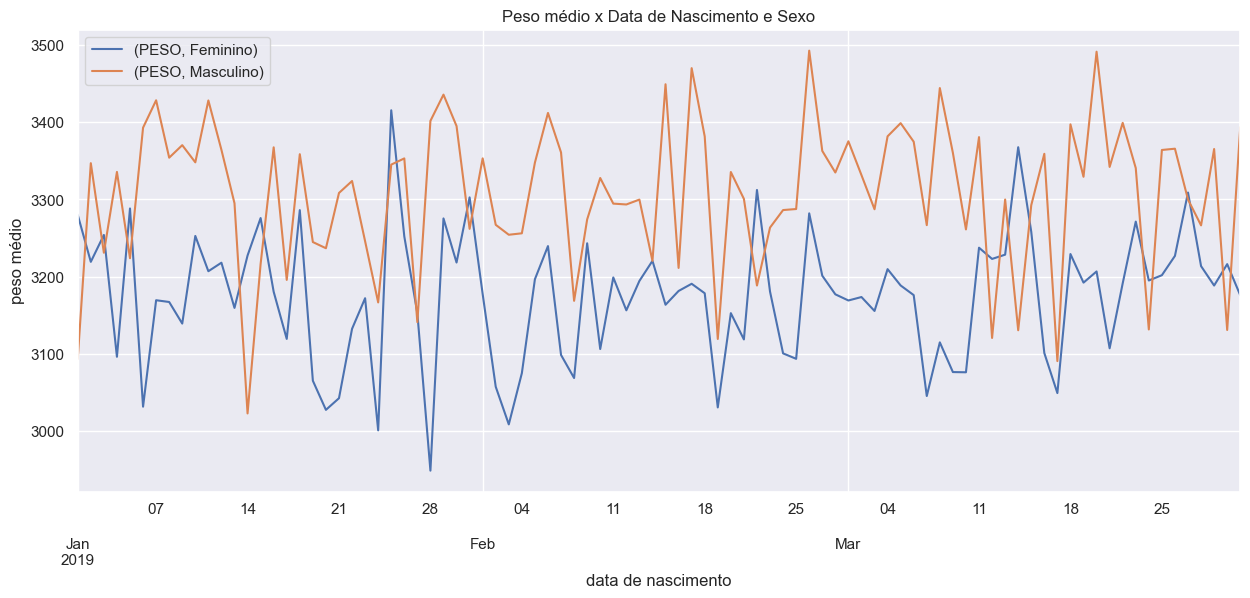

In [7]:
pd.pivot_table(sinasc_mar, values='PESO', index=['DTNASC', 'SEXO'],
               aggfunc='mean').unstack().plot(figsize=[15, 6])
plt.legend()
plt.title("Peso médio x Data de Nascimento e Sexo")
plt.xlabel("data de nascimento")
plt.ylabel('peso médio');

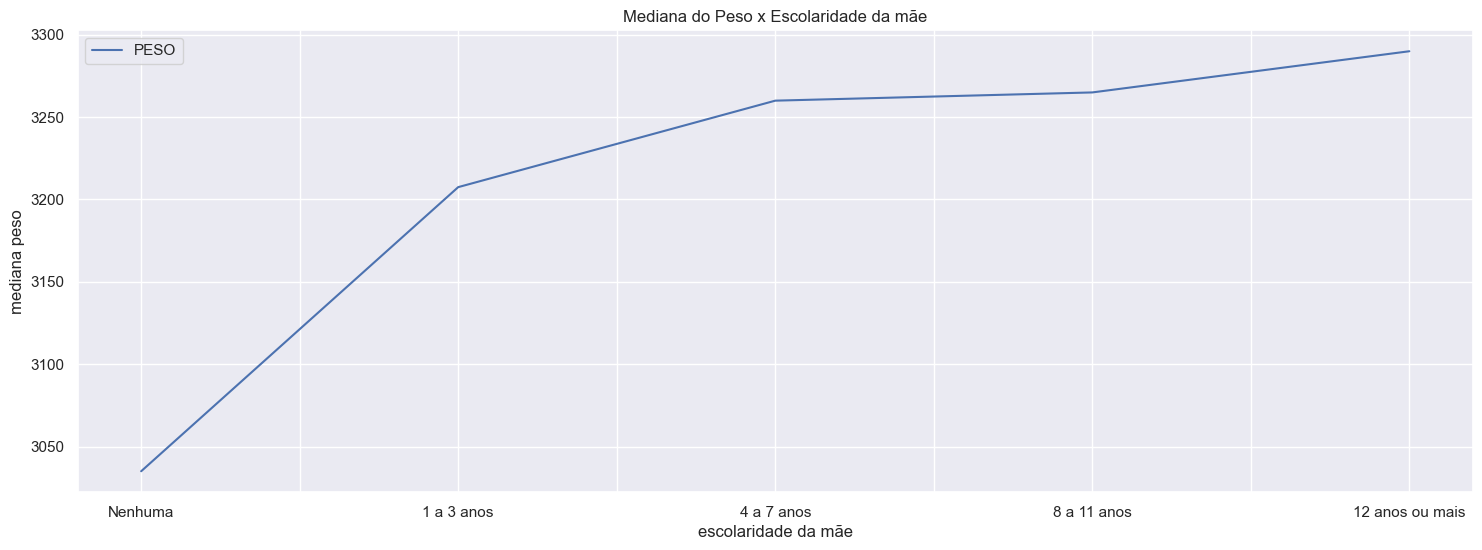

In [8]:
pd.pivot_table(sinasc_mar, values='PESO', index=['ESCMAE'],
               aggfunc='median').sort_values('PESO').plot(figsize=[18, 6])
plt.legend()
plt.title("Mediana do Peso x Escolaridade da mãe")
plt.xlabel("escolaridade da mãe")
plt.ylabel('mediana peso');

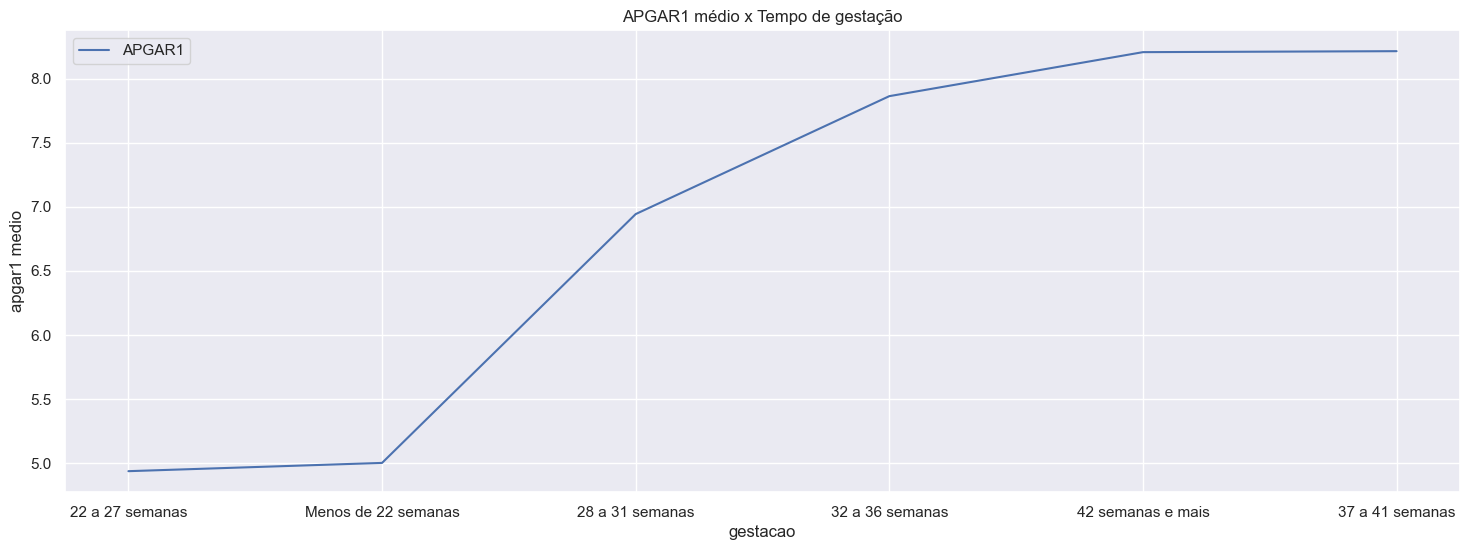

In [9]:
pd.pivot_table(sinasc_mar, values='APGAR1', index=['GESTACAO'],
               aggfunc='mean').sort_values('APGAR1').plot(figsize=[18, 6])
plt.legend()
plt.title("APGAR1 médio x Tempo de gestação")
plt.ylabel('apgar1 medio')
plt.xlabel('gestacao');

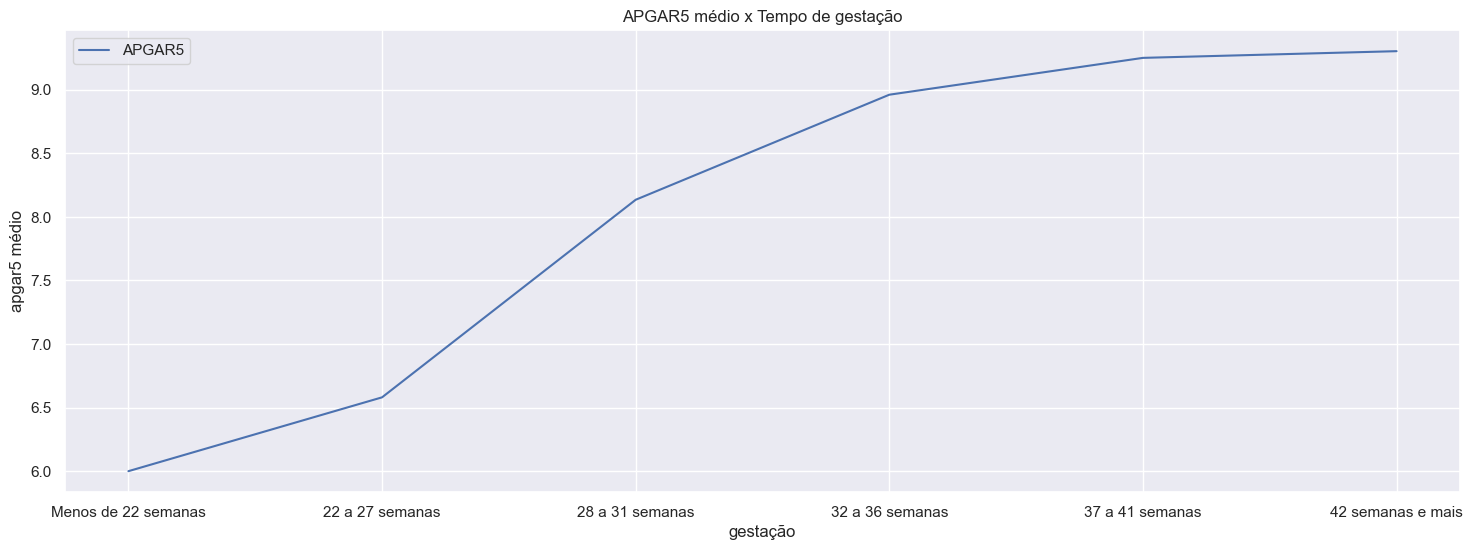

In [10]:
pd.pivot_table(sinasc_mar, values='APGAR5', index=['GESTACAO'],
               aggfunc='mean').sort_values('APGAR5').plot(figsize=[18, 6])
plt.legend()
plt.title("APGAR5 médio x Tempo de gestação")
plt.ylabel('apgar5 médio')
plt.xlabel('gestação');

Como os gráficos terão o mesmo padrão para todos os meses, posso criar uma função que receba o dataframe e gere os gráficos de acordo

In [11]:
def plot_sinasc_mes(dataframe):
    pd.pivot_table(dataframe, values='IDADEMAE', index='DTNASC',
               aggfunc='mean').plot(figsize=[15, 5], title="Média Idade da Mãe x Data de Nascimento")
    plt.xlabel("data de nascimento")
    plt.ylabel('média idade mãe')

    pd.pivot_table(dataframe, values='IDADEMAE', index='DTNASC',
                aggfunc='count').plot(figsize=[15, 5], title="Quantidade de nascimentos x Data de Nascimento")
    plt.xlabel("data de nascimento")
    plt.ylabel('qtd nascimentos')

    pd.pivot_table(dataframe, values='IDADEMAE', index=['DTNASC', 'SEXO'],
                aggfunc='count').unstack().plot(figsize=[15, 6], title="Quantidade de nascimentos x Data de Nascimento e Sexo")
    plt.legend()
    plt.xlabel("data de nascimento")
    plt.ylabel('qtd nascimentos')

    pd.pivot_table(dataframe, values='PESO', index=['DTNASC', 'SEXO'],
                aggfunc='mean').unstack().plot(figsize=[15, 6], title="Peso médio x Data de Nascimento e Sexo")
    plt.legend()
    plt.xlabel("data de nascimento")
    plt.ylabel('peso médio')

    pd.pivot_table(dataframe, values='PESO', index=['ESCMAE'],
                aggfunc='median').sort_values('PESO').plot(figsize=[18, 6], title="Mediana do Peso x Escolaridade da mãe")
    plt.xlabel("escolaridade da mãe")
    plt.ylabel('mediana peso')

    pd.pivot_table(dataframe, values='APGAR1', index=['GESTACAO'],
                aggfunc='mean').sort_values('APGAR1').plot(figsize=[18, 6], title="APGAR1 médio x Tempo de gestação")
    plt.ylabel('apgar1 medio')
    plt.xlabel('gestacao')
    
    pd.pivot_table(dataframe, values='APGAR5', index=['GESTACAO'],
                aggfunc='mean').sort_values('APGAR5').plot(figsize=[18, 6], title="APGAR5 médio x Tempo de gestação")
    plt.ylabel('apgar5 médio')
    plt.xlabel('gestação');

Vou criar também uma função para adquirir os dados e formatar a data

In [12]:
def get_data_format(caminho):

    dados = pd.read_csv(caminho)
    dados['DTNASC'] = pd.to_datetime(sinasc_mar['DTNASC'], dayfirst=True)

    return dados

Gerando os gráficos para Abril

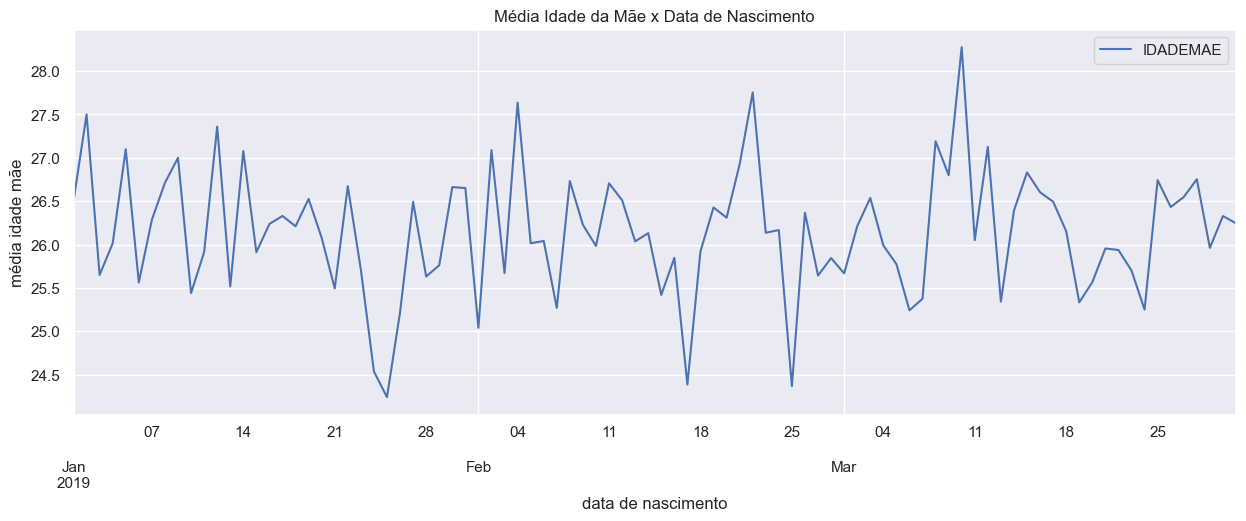

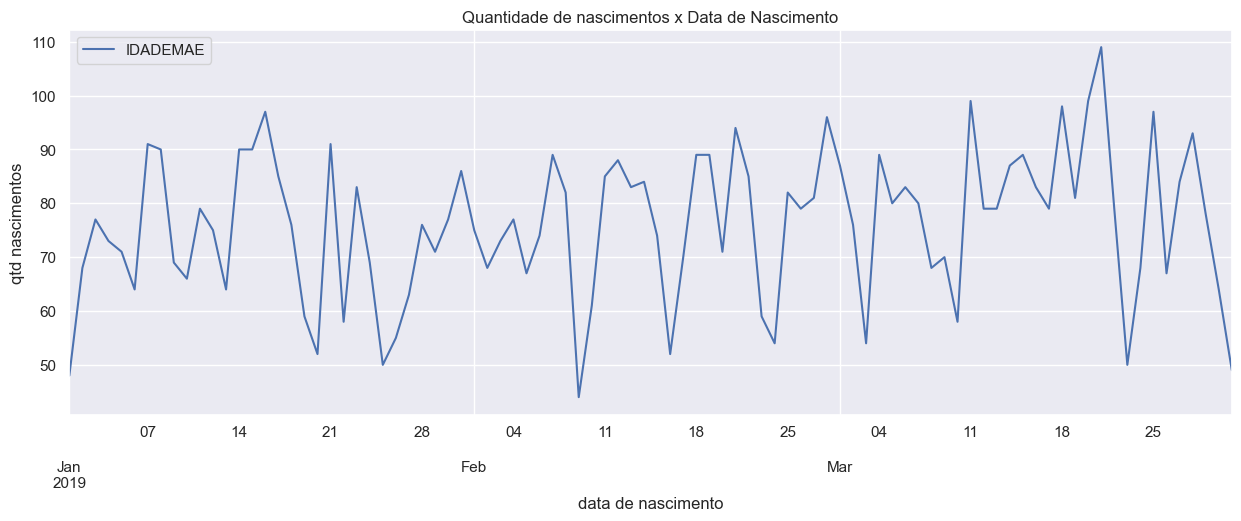

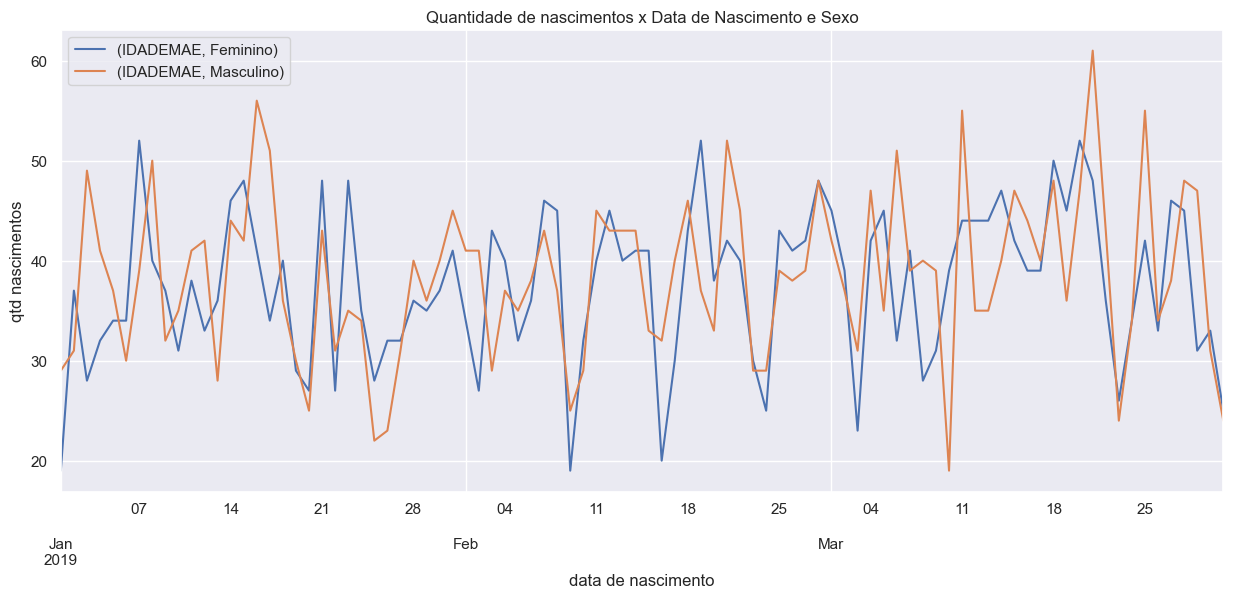

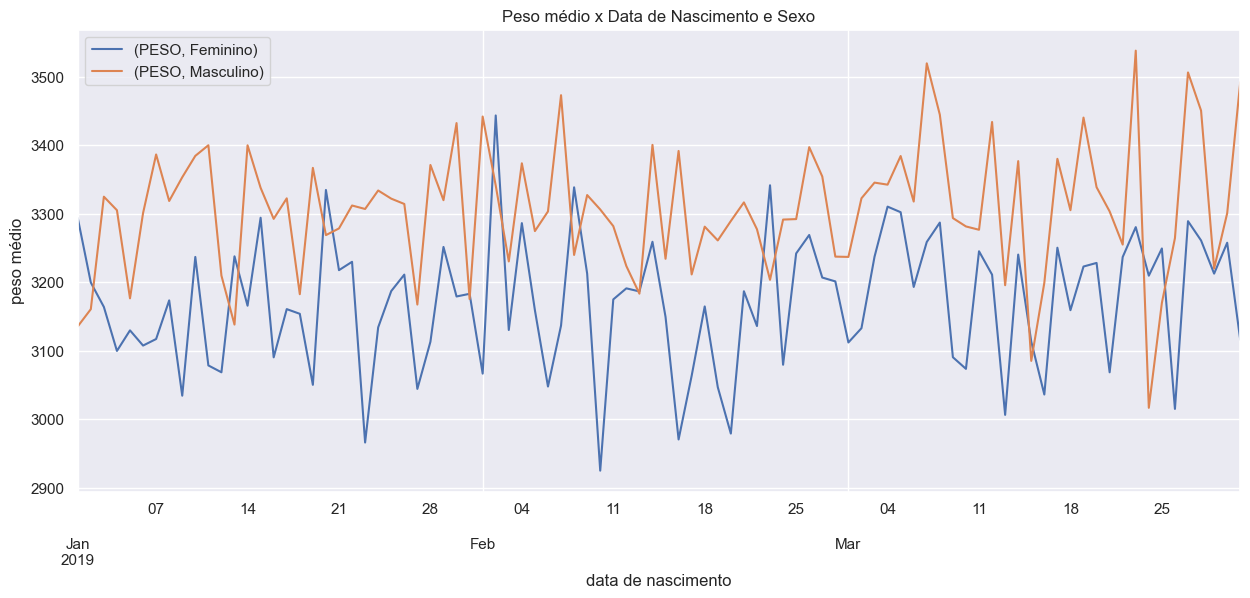

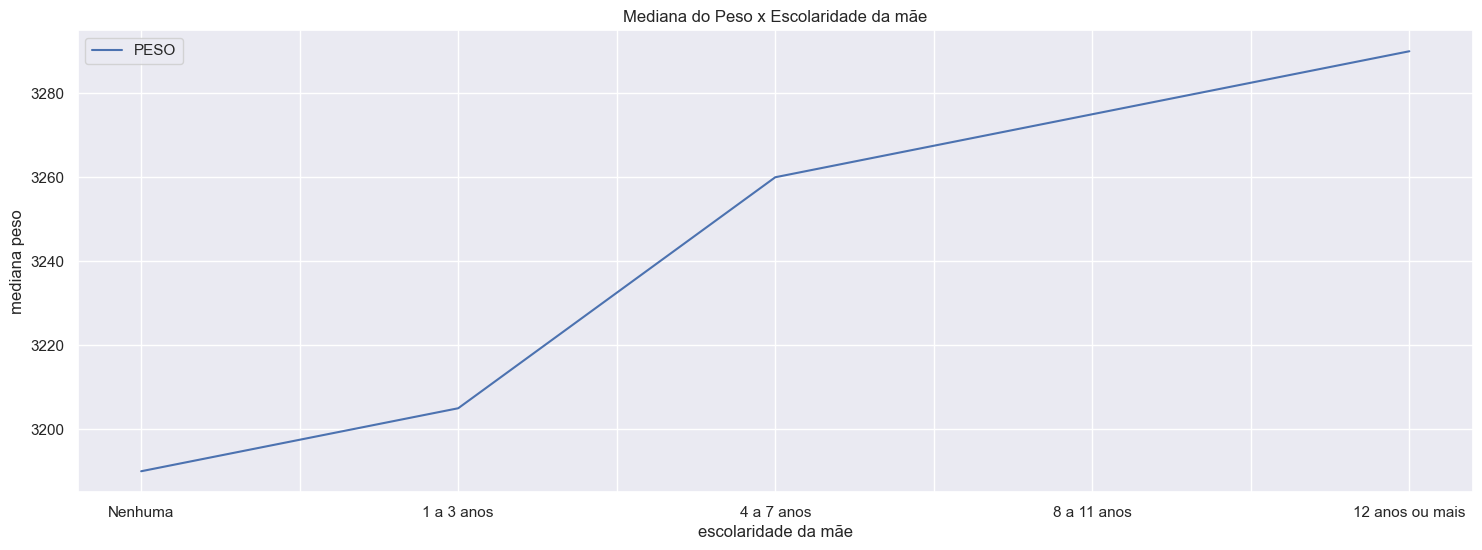

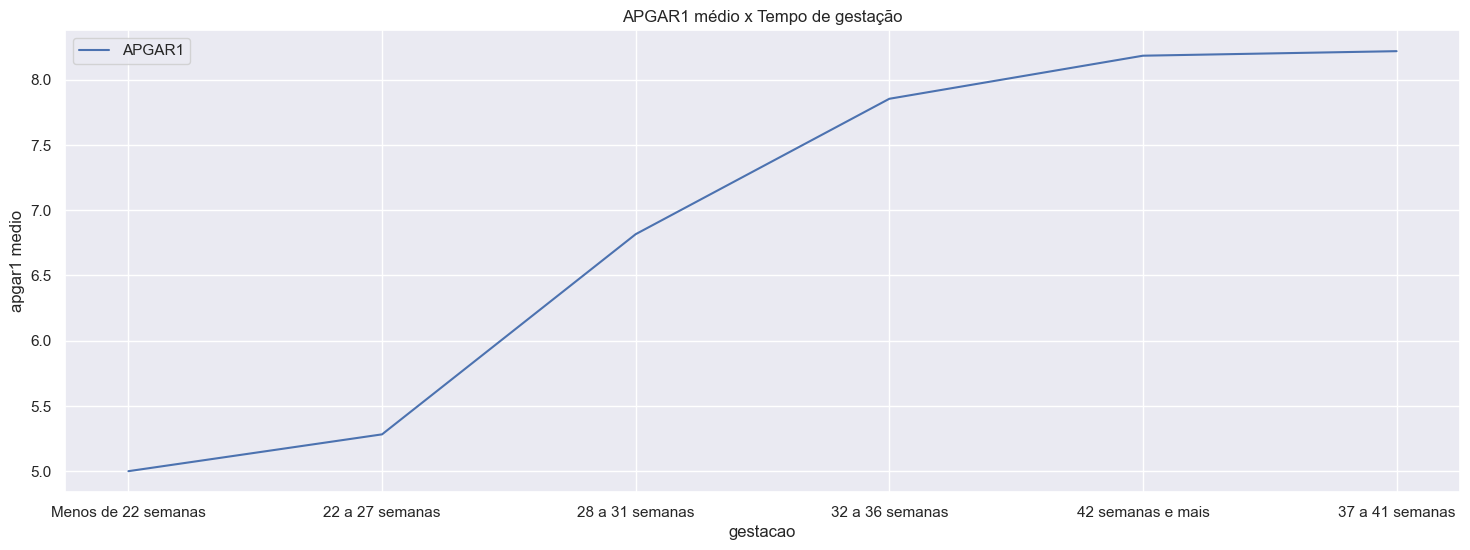

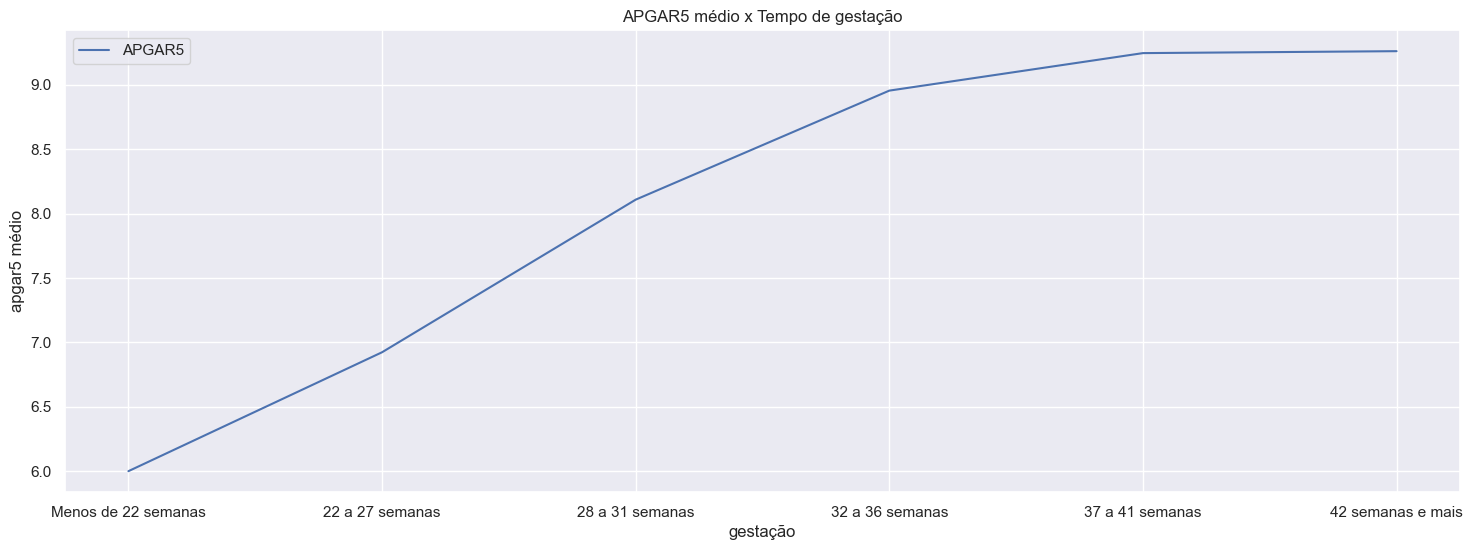

In [13]:
sinasc_abr = get_data_format('input\SINASC_RO_2019_ABR.csv')
plot_sinasc_mes(sinasc_abr)

Tendo garantido que tudo funciona corretamente até aqui, vou incorporar as duas funções em uma terceira para gerar os gráficos em .png e salvá-los em pastas neste ambiente. Para tal, vou usar *DTNASC* em cada arquivo como nome da pasta

In [14]:
pd.to_datetime(sinasc_abr.DTNASC, dayfirst=True).max().strftime("%m-%Y")

'03-2019'

Como a quantidade de gráficos que será gerada é grande (5 meses x 6 gráficos), vou fazer um pequeno ajuste na função que gera os gráficos para apenas salvá-los como .png e não exibir na tela. Vou aproveitar e sintetizar o código todo na próxima célula.

In [15]:
# Função para gerar os gráficos

def plot_sinasc_mes_savefig(dataframe):

    mes_ano = pd.to_datetime(dataframe.DTNASC, dayfirst=True).max().strftime("%m-%Y")

    os.makedirs(f'./output/figs/{mes_ano}', exist_ok=True)

    pd.pivot_table(dataframe, values='IDADEMAE', index='DTNASC',
               aggfunc='mean').plot(figsize=[15, 5], title="Média Idade da Mãe x Data de Nascimento")
    plt.xlabel("data de nascimento")
    plt.ylabel('média idade mãe')
    plt.tight_layout()
    plt.savefig(f'./output/figs/{mes_ano}/media idade mae x qtd nascimentos.png')
    plt.close()

    pd.pivot_table(dataframe, values='IDADEMAE', index='DTNASC',
                aggfunc='count').plot(figsize=[15, 5], title="Quantidade de nascimentos x Data de Nascimento")
    plt.xlabel("data de nascimento")
    plt.ylabel('qtd nascimentos')
    plt.tight_layout()
    plt.savefig(f'./output/figs/{mes_ano}/quantidade de nascimentos.png')
    plt.close()

    pd.pivot_table(dataframe, values='IDADEMAE', index=['DTNASC', 'SEXO'],
                aggfunc='count').unstack().plot(figsize=[15, 6], title="Quantidade de nascimentos x Data de Nascimento e Sexo")
    plt.legend()
    plt.xlabel("data de nascimento")
    plt.ylabel('qtd nascimentos')
    plt.tight_layout()
    plt.savefig(f'./output/figs/{mes_ano}/quantidade de nascimentos por sexo.png')
    plt.close()

    pd.pivot_table(dataframe, values='PESO', index=['DTNASC', 'SEXO'],
                aggfunc='mean').unstack().plot(figsize=[15, 6], title="Peso médio x Data de Nascimento e Sexo")
    plt.legend()
    plt.xlabel("data de nascimento")
    plt.ylabel('peso médio')
    plt.tight_layout()
    plt.savefig(f'./output/figs/{mes_ano}/peso medio por sexo de nascimentos.png')
    plt.close()

    pd.pivot_table(dataframe, values='PESO', index=['ESCMAE'],
                aggfunc='median').sort_values('PESO').plot(figsize=[18, 6], title="Mediana do Peso x Escolaridade da mãe")
    plt.xlabel("escolaridade da mãe")
    plt.ylabel('mediana peso')
    plt.tight_layout()
    plt.savefig(f'./output/figs/{mes_ano}/mediana peso x escolaridade mae.png')
    plt.close()

    pd.pivot_table(dataframe, values='APGAR1', index=['GESTACAO'],
                aggfunc='mean').sort_values('APGAR1').plot(figsize=[18, 6], title="APGAR1 médio x Tempo de gestação")
    plt.ylabel('apgar1 medio')
    plt.xlabel('gestacao')
    plt.tight_layout()
    plt.savefig(f'./output/figs/{mes_ano}/media apgar1 x tempo gestacao.png')
    plt.close()

    pd.pivot_table(dataframe, values='APGAR5', index=['GESTACAO'],
                aggfunc='mean').sort_values('APGAR5').plot(figsize=[18, 6], title="APGAR5 médio x Tempo de gestação")
    plt.ylabel('apgar5 médio')
    plt.xlabel('gestação')
    plt.tight_layout()
    plt.savefig(f'./output/figs/{mes_ano}/media apgar1 x tempo gestacao.png')
    plt.close()

# Função para ler os arquivos .csv e formatar a data

def get_data_format(caminho):

    dados = pd.read_csv(caminho)
    dados['DTNASC'] = pd.to_datetime(dados['DTNASC'])

    return dados

# Lista com os arquivos desejados (Março, Abril, Maio, Junho e Dezembro)

arquivos = ['input\SINASC_RO_2019_MAR.csv', 'input\SINASC_RO_2019_ABR.csv', 'input\SINASC_RO_2019_MAI.csv',
             'input\SINASC_RO_2019_JUN.csv', 'input\SINASC_RO_2019_DEZ.csv']

# Execução do script

for arquivo in arquivos:
    df = get_data_format(arquivo)
    plot_sinasc_mes_savefig(df)

Uma forma de tornar esse processo ainda mais automatizado é implementar uma GUI que permita ao usuário selecionar os arquivos desejados, ou então um script executável que peça ao usuário os meses e anos em um determinado formato.